IMPORT LIBRARIES/DATASETS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [6]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [4]:
x_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

PERFORM IMAGES VISUALIZATION

4

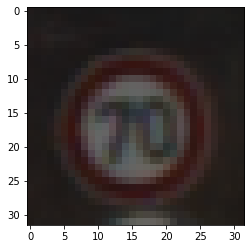

In [9]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

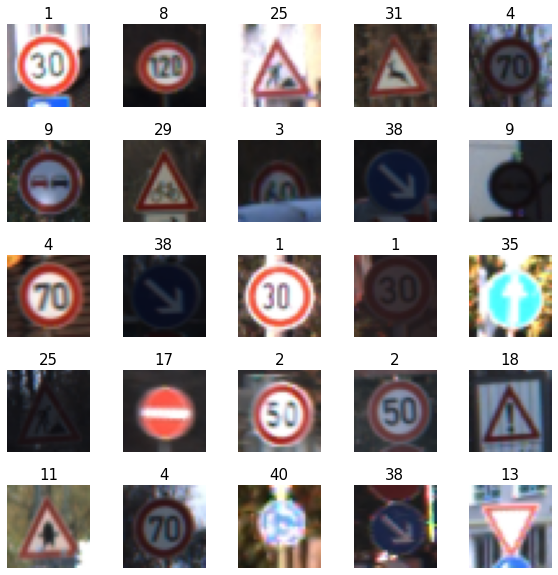

In [13]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid*L_grid):
    # Select a random number
    index= np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)
    

        

CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [15]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [22]:
x_train_gray = np.sum(x_train/3, axis=3, keepdims=True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims=True)
x_validation_gray = np.sum(x_validation/3, axis=3, keepdims=True)

In [18]:
x_train_gray.shape

(34799, 32, 32, 1)

In [23]:
x_train_gray_norm = (x_train_gray - 128)/128
x_test_gray_norm = (x_test_gray - 128)/128
x_validation_gray_norm = (x_validation_gray - 128)/128

In [20]:
x_train_gray_norm

array([[[[ 0.828125  ],
         [ 0.828125  ],
         [ 0.83854167],
         ...,
         [ 0.84114583],
         [ 0.83854167],
         [ 0.82291667]],

        [[ 0.84375   ],
         [ 0.84114583],
         [ 0.84375   ],
         ...,
         [ 0.82552083],
         [ 0.83072917],
         [ 0.8125    ]],

        [[ 0.82552083],
         [ 0.82291667],
         [ 0.83333333],
         ...,
         [ 0.72135417],
         [ 0.69270833],
         [ 0.62239583]],

        ...,

        [[ 0.77604167],
         [ 0.77083333],
         [ 0.77604167],
         ...,
         [ 0.77083333],
         [ 0.77864583],
         [ 0.7734375 ]],

        [[ 0.77604167],
         [ 0.76302083],
         [ 0.77864583],
         ...,
         [ 0.78125   ],
         [ 0.77083333],
         [ 0.76041667]],

        [[ 0.76302083],
         [ 0.74739583],
         [ 0.765625  ],
         ...,
         [ 0.77604167],
         [ 0.78125   ],
         [ 0.765625  ]]],


       [[[-0.45833333],


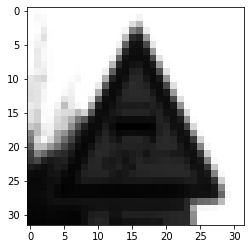

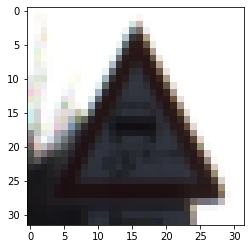

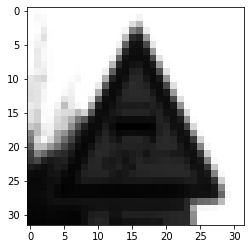

In [24]:
i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [26]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation = 'relu', input_shape = (32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5, 5), activation = 'relu',))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [27]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [29]:
history = CNN.fit(x_train_gray_norm,
                 y_train,
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (x_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 24s 693us/sample - loss: 0.6887 - accuracy: 0.7976 - val_loss: 0.7443 - val_accuracy: 0.7791
Epoch 2/50
34799/34799 [==============================] - 25s 713us/sample - loss: 0.5784 - accuracy: 0.8290 - val_loss: 0.6992 - val_accuracy: 0.7939
Epoch 3/50
34799/34799 [==============================] - 24s 680us/sample - loss: 0.5153 - accuracy: 0.8500 - val_loss: 0.6202 - val_accuracy: 0.8170
Epoch 4/50
34799/34799 [==============================] - 24s 688us/sample - loss: 0.4519 - accuracy: 0.8680 - val_loss: 0.5804 - val_accuracy: 0.8331
Epoch 5/50
34799/34799 [==============================] - 24s 679us/sample - loss: 0.4199 - accuracy: 0.8777 - val_loss: 0.5644 - val_accuracy: 0.8367
Epoch 6/50
34799/34799 [==============================] - 24s 678us/sample - loss: 0.3717 - accuracy: 0.8924 - val_loss: 0.5766 - val_accuracy: 0.8336
Epoch 7/50
34799/34799 [=====================

ASSESS TRAINED CNN MODEL PERFORMANCE 

In [30]:
score = CNN.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 5s 410us/sample - loss: 0.7581 - accuracy: 0.9036
Test Accuracy: 0.9036421179771423


In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

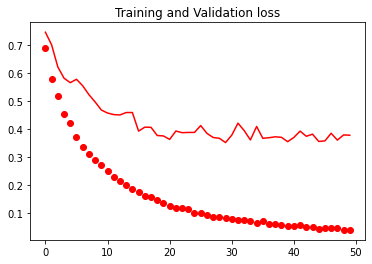

In [34]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

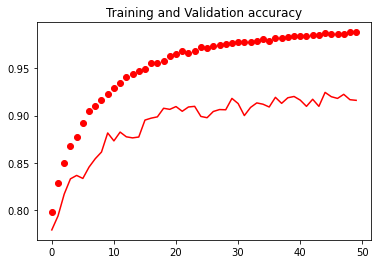

In [35]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')

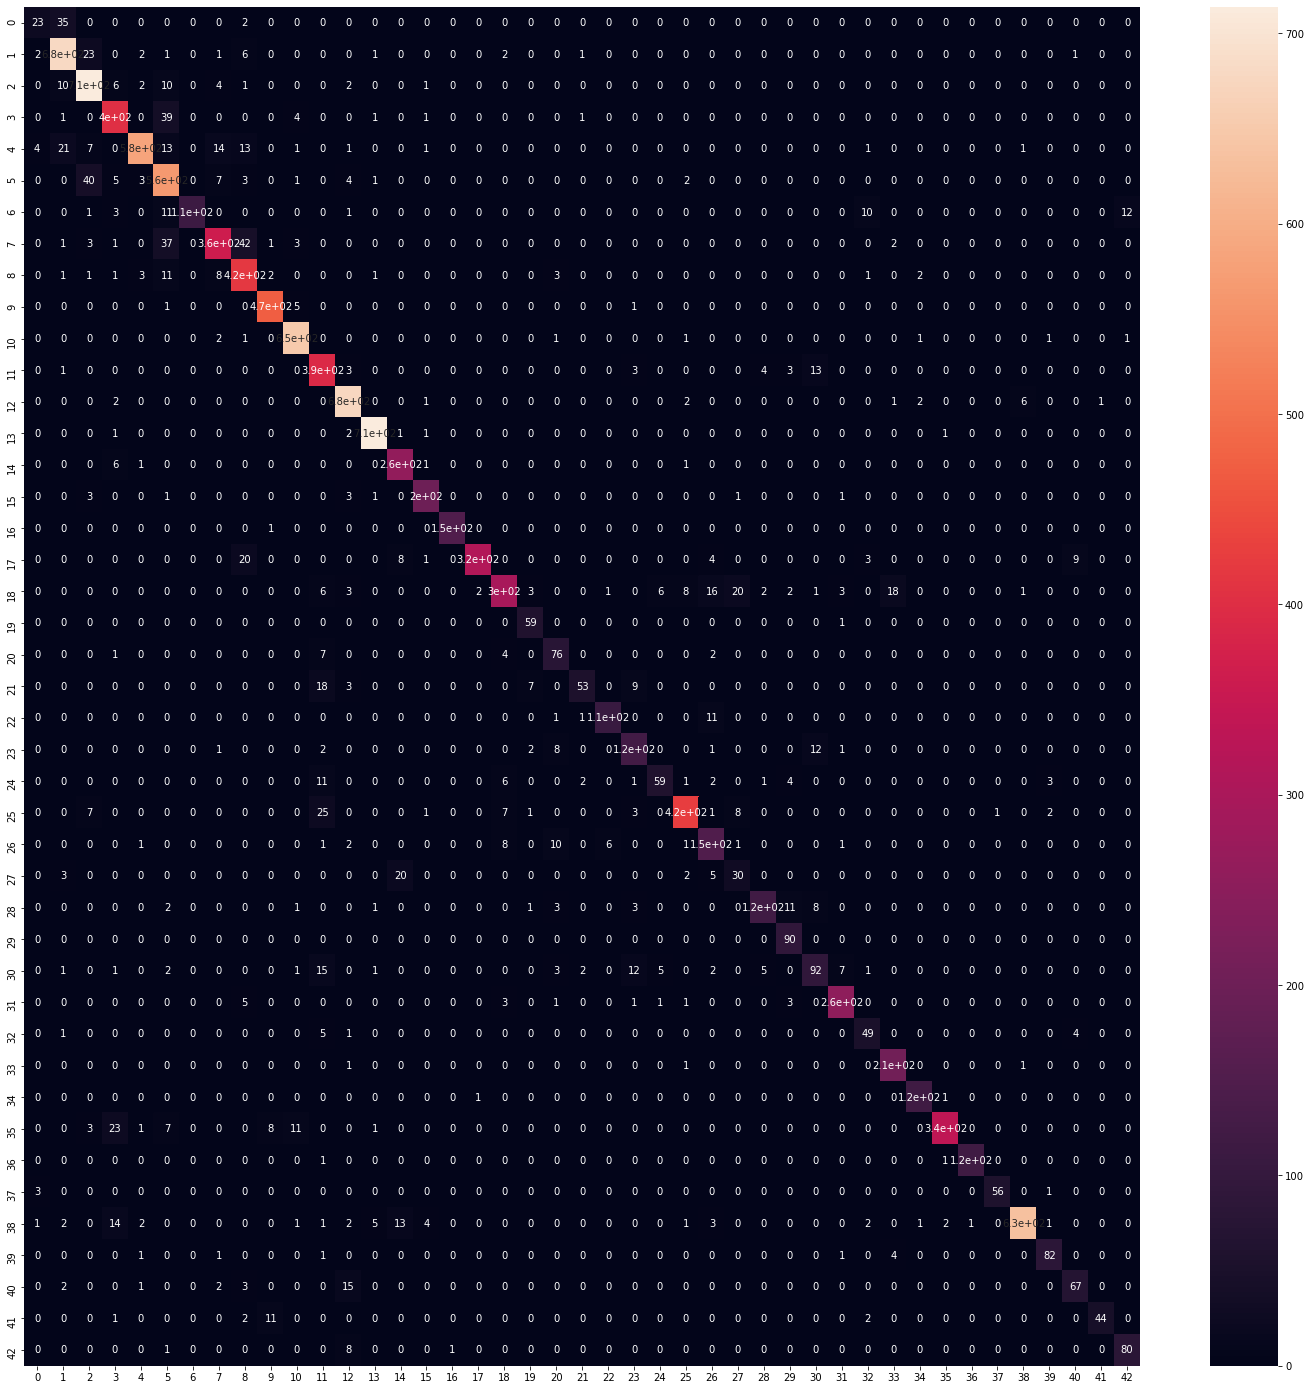

In [36]:
predicted_classes = CNN.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

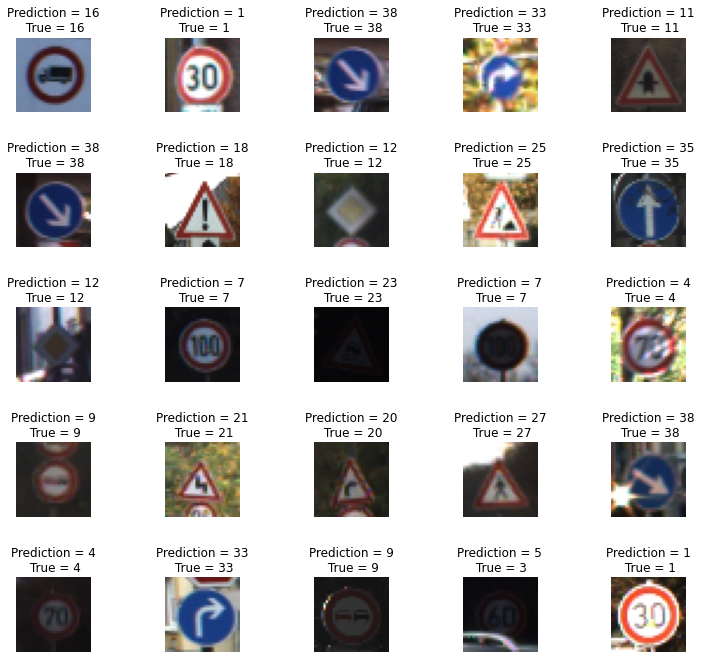

In [38]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    